In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir('C:/Users/dzfal')

In [4]:
df = pd.read_csv('OneDrive/Desktop/2023spring/DMP/A3/Assignment_3_23-1/Assignment_3/Titanic Survival/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
Age,0.198653
Cabin,0.771044
Embarked,0.002245


<AxesSubplot:xlabel='Age', ylabel='Density'>

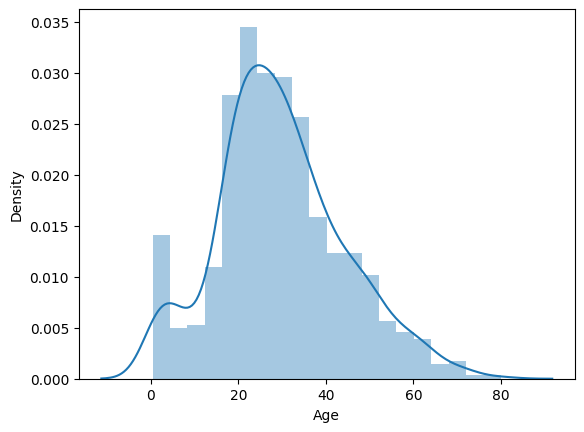

In [6]:
sns.distplot(df[df['Age'].notnull()]['Age'])

**It is not intuitive to impute the variable 'Age', but from the distribution, we probably can impute with mean in this case. To compare the performance, I created two datasets, and one of them impute 'Age' with mean and the other drops NaN rows in 'Age'. We handle the 'Age' last because we have to impute other numeric variables before dropping the rows to make sure we don't lose the information.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Since variable 'Cabin' has a percentage of NaN values over 70%, we can just drop the column.**

In [8]:
df = df.drop(['Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
df['Title']=df.Name.str.extract(".*,( [A-z]+)\.")
df = df.drop(['Name'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C,Mr


In [10]:
df.Title.value_counts()

 Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Major         2
 Mlle          2
 Col           2
 Sir           1
 Capt          1
 Mme           1
 Lady          1
 Ms            1
 Jonkheer      1
 Don           1
Name: Title, dtype: int64

**Variable 'name' can be dropped, but we can see the passenger's name contains the title, maybe in some cases title can affect the survival.**

In [11]:
df['Family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family
0,1,0,3,male,22.0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,female,38.0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,female,35.0,113803,53.1000,S,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,S,Rev,0
887,888,1,1,female,19.0,112053,30.0000,S,Miss,0
888,889,0,3,female,NaN,W./C. 6607,23.4500,S,Miss,3
889,890,1,1,male,26.0,111369,30.0000,C,Mr,0


**The SibSp means siblings and spouse, and the Parch means parents and children, we can combine these two categories into one category 'Family'. Different values in 'Family' means the existence of parents, children, spouse, and siblings.**

In [12]:
## Drop the PassengerId
df = df.drop(['PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family
0,0,3,male,22.0,A/5 21171,7.2500,S,Mr,1
1,1,1,female,38.0,PC 17599,71.2833,C,Mrs,1
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,female,35.0,113803,53.1000,S,Mrs,1
4,0,3,male,35.0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,211536,13.0000,S,Rev,0
887,1,1,female,19.0,112053,30.0000,S,Miss,0
888,0,3,female,NaN,W./C. 6607,23.4500,S,Miss,3
889,1,1,male,26.0,111369,30.0000,C,Mr,0


**Now we can handle the missing values in 'Age' and 'Embarked'.**

In [13]:
df1 = df.dropna(subset=['Age', 'Embarked', 'Title'])
df2 = df.dropna(subset=['Embarked'])

In [14]:
df2['Age'] = df2['Age'].fillna(np.nanmean(df2['Age']))
df2

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family
0,0,3,male,22.000000,A/5 21171,7.2500,S,Mr,1
1,1,1,female,38.000000,PC 17599,71.2833,C,Mrs,1
2,1,3,female,26.000000,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,female,35.000000,113803,53.1000,S,Mrs,1
4,0,3,male,35.000000,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,211536,13.0000,S,Rev,0
887,1,1,female,19.000000,112053,30.0000,S,Miss,0
888,0,3,female,29.642093,W./C. 6607,23.4500,S,Miss,3
889,1,1,male,26.000000,111369,30.0000,C,Mr,0


In [15]:
df1 = df1.drop(['Ticket'], axis=1)
df2 = df2.drop(['Ticket'], axis=1)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  711 non-null    int64  
 1   Pclass    711 non-null    int64  
 2   Sex       711 non-null    object 
 3   Age       711 non-null    float64
 4   Fare      711 non-null    float64
 5   Embarked  711 non-null    object 
 6   Title     711 non-null    object 
 7   Family    711 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 50.0+ KB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    object 
 6   Title     888 non-null    object 
 7   Family    889 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.5+ KB


## Get dummies

In [43]:
c = ['Embarked', 'Title', 'Sex']
X1 = pd.get_dummies(df1, columns=c)
X2= pd.get_dummies(df2, columns=c)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
y = ['Survived']
y1 = X1[y]
y2 = X2[y]
X1 = X1.drop(columns=y)
X2 = X2.drop(columns=y)

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=0)

In [47]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [48]:
def dmp_first_classifier(model, X1_train, y1_train, X1_test, y1_test):
    classifier = model()
    classifier.fit(X1_train, y1_train)
    y_pred = classifier.predict(X1_test)
    return accuracy_score(y1_test, y_pred), f1_score(y1_test, y_pred)

In [49]:
model = [LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, Perceptron, SGDClassifier, GradientBoostingClassifier]

In [50]:
acc1 = []
f1_1 = []
for model in model:
    ac, f1 = dmp_first_classifier(model, X1_train, y1_train, X1_test, y1_test)
    acc1.append(ac)
    f1_1.append(f1)
acc1

[0.7916666666666666,
 0.6111111111111112,
 0.75,
 0.6944444444444444,
 0.6944444444444444,
 0.7777777777777778,
 0.7777777777777778,
 0.5138888888888888,
 0.75,
 0.7916666666666666]

In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent', 'Gradient Boosting'],
    
    'Score': acc1,
    'F1': f1
    })

models

,Model,Score,F1
0,Logistic Regression,0.791667,0.769231
1,Support Vector Machines,0.611111,0.769231
2,Linear SVC,0.750000,0.769231
3,KNN,0.694444,0.769231
4,Decision Tree,0.694444,0.769231
5,Random Forest,0.777778,0.769231
6,Naive Bayes,0.777778,0.769231
7,Perceptron,0.513889,0.769231
8,Stochastic Gradient Decent,0.750000,0.769231
9,Gradient Boosting,0.791667,0.769231


**We choose the gradient boosting**

In [52]:
df1 = pd.read_csv('OneDrive/Desktop/2023spring/DMP/A3/Assignment_3_23-1/Assignment_3/Titanic Survival/holdout_test.csv')

df1.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
nulls = df1.isna().sum()
null_percent = nulls[nulls>0] / len(df1)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
Survived,1.000000
Age,0.205742
Fare,0.002392
Cabin,0.782297


In [54]:
df1 = df1.drop(columns=['Survived', 'Cabin'], axis=1)
df1['Title']=df1.Name.str.extract(".*,( [A-z]+)\.")
df1 = df1.drop(['Name'], axis=1)

In [55]:
df1['Family'] = df1['SibSp'] + df1['Parch']
df1 = df1.drop(['SibSp', 'Parch'], axis=1)

In [56]:
df1 = df1.drop(['PassengerId'], axis=1)

In [57]:
df1 = df1.dropna(subset=['Age', 'Embarked', 'Title']).drop(['Ticket'], axis=1)

In [58]:
c = ['Embarked', 'Title', 'Sex']
X1 = pd.get_dummies(df1, columns=c)

In [59]:
new = ['Title_ Capt',
 'Title_ Don',
 'Title_ Jonkheer',
 'Title_ Lady',
 'Title_ Major',
 'Title_ Mlle',
 'Title_ Mme',
 'Title_ Ms',
 'Title_ Sir']

In [60]:
X1_train['Title_ Dona'] = 0

In [61]:
X1_train

,Pclass,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S,Title_ Capt,Title_ Col,Title_ Don,...,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Sex_female,Sex_male,Title_ Dona
417,2,18.0,13.0000,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
726,2,30.0,21.0000,3,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
197,3,42.0,8.4042,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
263,1,40.0,0.0000,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
340,2,2.0,26.0000,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,3,5.0,19.2583,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
239,2,33.0,12.2750,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
794,3,25.0,7.8958,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
705,2,39.0,26.0000,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [62]:
X1[new] = 0

In [63]:
X1.dropna(subset=['Fare'], inplace=True)
X1

,Pclass,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S,Title_ Col,Title_ Dona,Title_ Dr,...,Sex_male,Title_ Capt,Title_ Don,Title_ Jonkheer,Title_ Lady,Title_ Major,Title_ Mlle,Title_ Mme,Title_ Ms,Title_ Sir
0,3,34.5,7.8292,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,47.0,7.0000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,62.0,9.6875,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,27.0,8.6625,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,22.0,12.2875,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3,3.0,13.7750,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411,1,37.0,90.0000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
412,3,28.0,7.7750,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,1,39.0,108.9000,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
classifier = GradientBoostingClassifier()
classifier.fit(X1_train, y1_train)
y_pred = classifier.predict(X1)

In [67]:
df_pred = pd.DataFrame(y_pred)
df_pred.to_csv('OneDrive/Desktop/2023spring/DMP/A3/Assignment_3_23-1/Assignment_3/Titanic Survival/Titanic Results from Zhuofan Dong 12372250.csv', index=False)

## Write-up

**In this case, I think it is wise to transfer the name to its title, because it is very likely containing important information. For the models, given we have the data with sparsity, some of the model cannot handle the sparsity well. Gradient Boosting, instead, has a relatively strong performance for sparsity. But it is easy to overfit and the results are hard to interpret for gradient boosting model. So we have to choose the model based on our needs**